# Lab 1
Noah Kim

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
matplotlib.rc('font', size=18)
import numpy as np
import pandas as pd
from scipy import stats

# A Little Statistics

# Standard Normal Distribution 

Before starting to understand Standard Normal Distribution, we first have to learn more about Gaussian Distribution. A Gaussian disribution is $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, for mean value $\mu$ and standard deviation $\sigma$.

The standard normal distribution is the Gaussian distribution of a random variable of mean $\mu=0$ and standard deviation $\sigma=1$. When a value lies outside the mean, the distance from the mean to the value can be expressed as a multiple of the standard deviation expressed in "z-score". For example, a value with a "z-score of 3" corresponds to the point located $3\sigma$ from $\mu$. 
The probability that a number from the distribution lies within a particular range of z-scores is found by integrating the Gaussian function from one z-score to the other. 

The following table is a Z table for Standard Normal Distribution.


| z   | +0.00   | +0.01   | +0.02   | +0.03   | +0.04   | +0.05   | +0.06   | +0.07   | +0.08   | +0.09   |
|-----|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
| 0.0 | 0.00000 | 0.00399 | 0.00798 | 0.01197 | 0.01595 | 0.01994 | 0.02392 | 0.02790 | 0.03188 | 0.03586 |
| 0.1 | 0.03983 | 0.04380 | 0.04776 | 0.05172 | 0.05567 | 0.05962 | 0.06356 | 0.06749 | 0.07142 | 0.07535 |
| 0.2 | 0.07926 | 0.08317 | 0.08706 | 0.09095 | 0.09483 | 0.09871 | 0.10257 | 0.10642 | 0.11026 | 0.11409 |
| 0.3 | 0.11791 | 0.12172 | 0.12552 | 0.12930 | 0.13307 | 0.13683 | 0.14058 | 0.14431 | 0.14803 | 0.15173 |
| 0.4 | 0.15542 | 0.15910 | 0.16276 | 0.16640 | 0.17003 | 0.17364 | 0.17724 | 0.18082 | 0.18439 | 0.18793 |
| 0.5 | 0.19146 | 0.19497 | 0.19847 | 0.20194 | 0.20540 | 0.20884 | 0.21226 | 0.21566 | 0.21904 | 0.22240 |
| 0.6 | 0.22575 | 0.22907 | 0.23237 | 0.23565 | 0.23891 | 0.24215 | 0.24537 | 0.24857 | 0.25175 | 0.25490 |
| 0.7 | 0.25804 | 0.26115 | 0.26424 | 0.26730 | 0.27035 | 0.27337 | 0.27637 | 0.27935 | 0.28230 | 0.28524 |
| 0.8 | 0.28814 | 0.29103 | 0.29389 | 0.29673 | 0.29955 | 0.30234 | 0.30511 | 0.30785 | 0.31057 | 0.31327 |
| 0.9 | 0.31594 | 0.31859 | 0.32121 | 0.32381 | 0.32639 | 0.32894 | 0.33147 | 0.33398 | 0.33646 | 0.33891 |
| 1.0 | 0.34134 | 0.34375 | 0.34614 | 0.34849 | 0.35083 | 0.35314 | 0.35543 | 0.35769 | 0.35993 | 0.36214 |

Integrating the standard normal distribution for $-1\sigma$, $1\sigma$, $2\sigma$, and $5\sigma$ 

In [3]:
integration = np.array([-1,1,2,5])
print(stats.norm.cdf(integration))

[0.15865525 0.84134475 0.97724987 0.99999971]


We get the probability in which a value lies between the respective $-1\sigma$, $1\sigma$, $2\sigma$, and $5\sigma$. However, we usually want to find the inverse of this integral returning the value of sigma. 

In [4]:
probabilities = np.array([0.15865525, 0.84134475, 0.97724987, 0.99999971])
print(stats.norm.ppf(probabilities))

[-1.00000002  1.00000002  2.00000004  4.99776036]


these are approximately $-1\sigma$, $1\sigma$, $2\sigma$, and $5\sigma$. The negative sign on each value indicates that it falls to the left of the mean (which is at 0).

# 2) Chi-Squared Distribution, k = 5

The chi-squared distribution is the sum of the squares of standard normal random variables. A value $A$ in the chi-squared distribution is equal to $\sum\limits_{i=1}^{k} Z_i^2$, where $Z_i$ is the $i^{th}$ standard-normally distributed variable, and $k$ is the number of _degrees of freedom_.

Defining k = 5, below is a histogram of chi-squared distributed data and the PDF for the distribution.

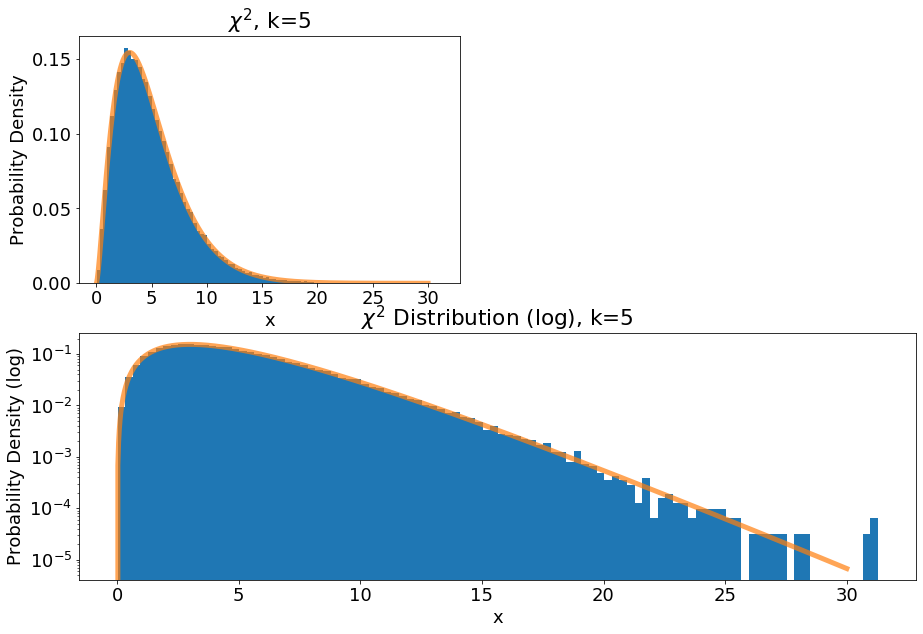

In [5]:
k = 5
x = np.linspace(0, 30, 1000)
r = stats.chi2.rvs(loc=0,scale=1,size=100000,df=5)
plt.subplot(2,2,1)
plt.title("$\chi^2$, k=5")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.hist(r, 100, density=True)
plt.plot(x, stats.chi2.pdf(x, k), linewidth=5,alpha=.7);

plt.subplot(2,1,2)
plt.yscale('log')
plt.title("$\chi^2$ Distribution (log), k=5")
plt.xlabel("x")
plt.ylabel("Probability Density (log)")
plt.hist(r, 100, density=True)
plt.plot(x, stats.chi2.pdf(x, k), linewidth=5,alpha=.7);

# 3) Signal-Free Data

Choosing the value of 8 for my hypothetical measurement. I am going to be asking the statistical question: Given that the signal free data follows a Chi-Squared distribution, What is the probability that my measurement will be <= 8?
I would need to take the integral of $P = \int\limits_{8}^{\infty} \frac{1}{2^{k/2}\Gamma({k/2})}x^{k/2 - 1}e^{-x/2}$.  

Using SciPy's CDF command, finding the probability of the value being <= 8.

In [6]:
probability = stats.chi2.cdf([8], k)
print(probability)

[0.84376437]


Using SciPy's PPF command, converting the given probability into a equivalent sigma value. 

In [7]:
print(stats.norm.ppf(probability,k))

[6.01005017]


This function is calling the ppf function on the Standard Normal Distribution and not the Chi-Squared distribution. When putting the probability in the form of sigma, I am really showing the probability as if the data was Gaussian. For example, integrating from 8 to $\infty$ on the chi-squared is the same as integrating from $6\sigma$ to $\infty$. So the probability of measuring a signal that is <= 8 is $6\sigma$.

Testing some more values (1, 4, 10): 

In [8]:
more_prob = stats.chi2.cdf([1,4,10],k)
print(more_prob)

[0.03743423 0.45058405 0.92476475]


Using SciPy's PPF command, converting the given probability into a equivalent sigma value. 

In [9]:
print(stats.norm.ppf(more_prob,k))

[3.21873062 4.87581411 6.43787159]


A common pattern seen is with higher probability of landing in the range of <= (tested value) the corresponding normal distribution sigma increases. 

# Binomial Distribution

The binomial distribution gives us a probability mass function to calculate the probability of some number of successes  𝑘  in  𝑛  trials, where  𝑝  is the probability of success for any given trial. For this distribution, I am using an example of a pass or fail quiz having 𝑛 amount of questions with a probability of 50% to guess the correct answer.

In [10]:
def plot_pass_fail(questions, p=0.5):
    d = stats.binom(questions, p)
    passes = np.arange(0, questions + 1)
    #Labels   
    plt.title(f"Probability of k passes for {questions} pass or fail questions")
    plt.xlabel("Number of passes, k")
    plt.ylabel("Probability Mass")
    #Axes and log y-scale
    plt.vlines(passes, 0, d.pmf(passes), linewidth=3)
    plt.xlim(0, questions)
    plt.ylim(0, None)

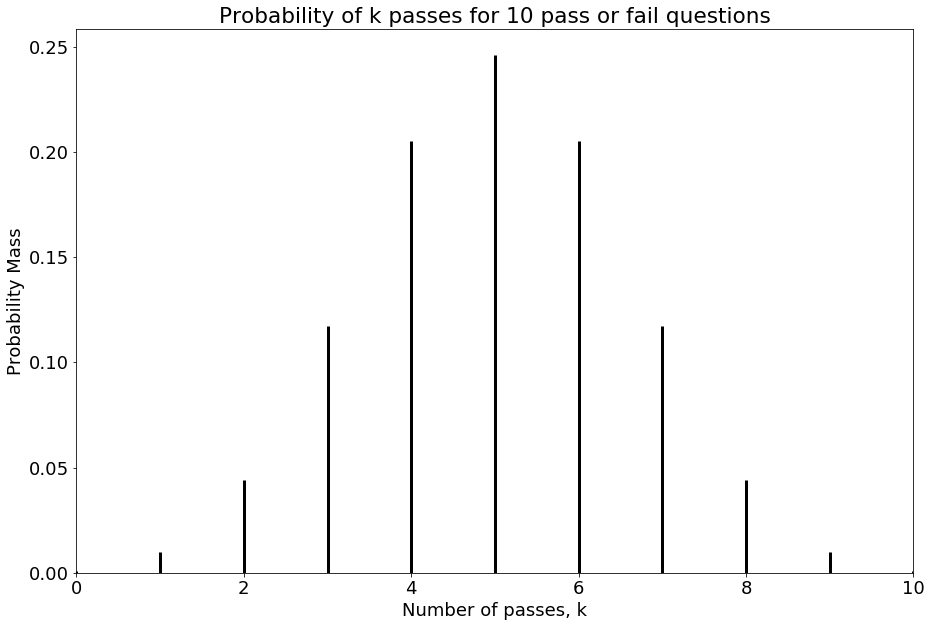

In [11]:
plot_pass_fail(10)

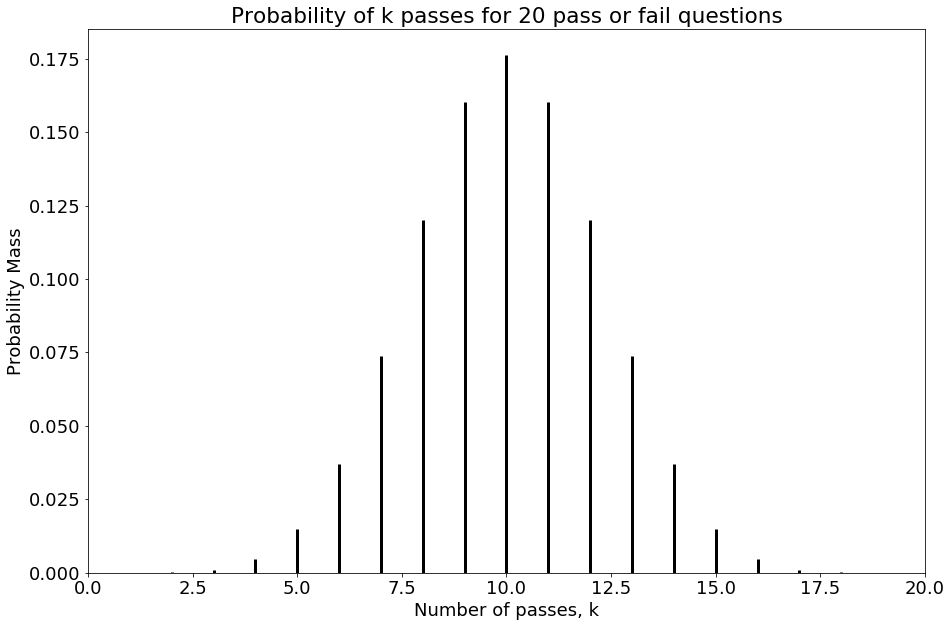

In [12]:
plot_pass_fail(20)

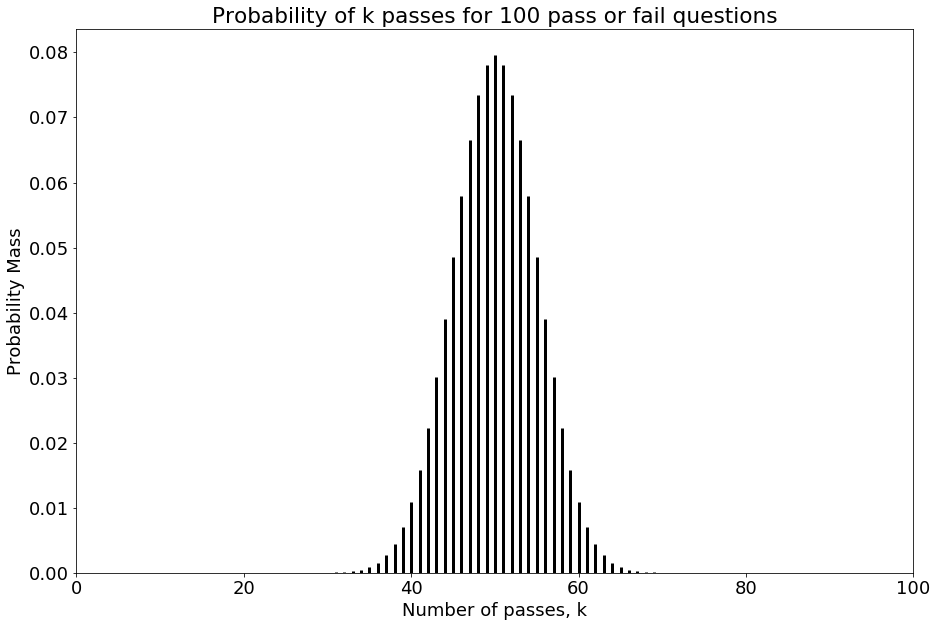

In [13]:
plot_pass_fail(100)

I opted to not use a logarithmic y-scale in order for you to see a better binomial distribution graph above. Above I created a series of plots consisting of 10 questions, 20 questions, and 100 questions.

An interesting pattern we see here is that a binomial distribution is that it mimicks a gaussian distribution and has a bell-curve like shape with the mean at about half the amount of questions. We see that the examples above are symmetrical and the probability of getting a value <= mean is 50%. 

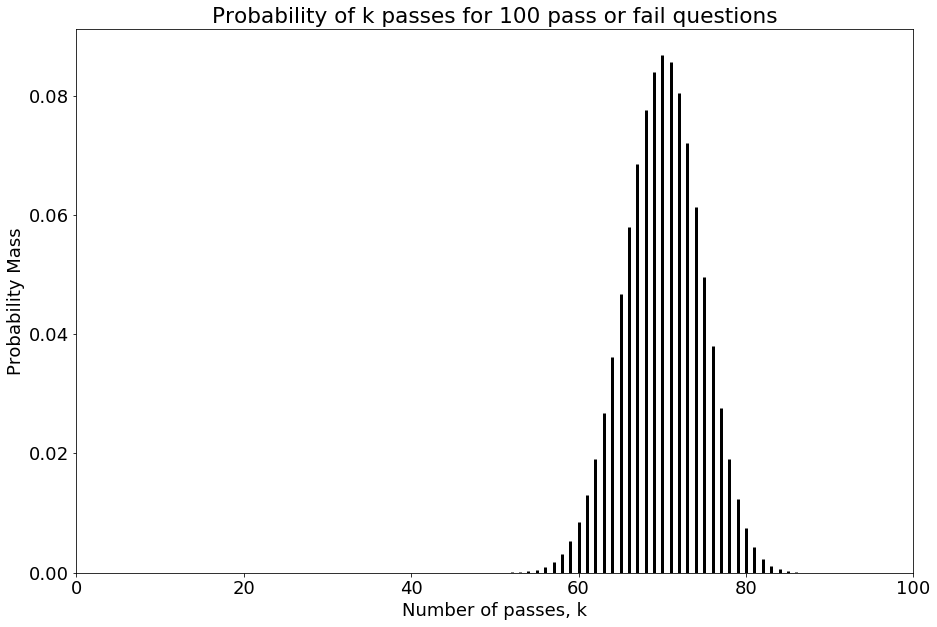

In [14]:
plot_pass_fail(100, 0.7)

When I changed the probability of guessing correctly to 70%, the distribution shifted and the mean lands at 70%. This means that the "mean" of the binomial distribution shifted to 70 from the 50 before. 

The statistical question I will be asking is: What is the probability of getting at most 40 passes? Given that the $p$ = 0.5 and $n$ = 100.

In [15]:
prob1 = sum(stats.binom.pmf(np.arange(0, 41), 100, 0.50))
print(prob1)

0.028443966820489292


This is about 2.8% of getting at most 40 passes. Converting into sigma of a normal distribution.

In [135]:
stats.norm.ppf(prob1)

-1.904170874331275

Resulting in 1.9 $\sigma$ on the left side of the distribution. For a discrete probability, I get a discrete sigma value. 

Having a discrete distribution and so having discrete probability and sigmas means for experiments that each experiment will be mutually exclusive in that the probability and sigma of each experiment will not be related to the same experiments tested multiple times.

While the results are discrete, the parameters are not. For examples mean does not have to be a discrete value versus. median or mode that have to be. Regardless of whether the values are continuous or discrete. The mean is a value that spans across the distribution unlike median or mode who are locked into a discrete value. Probability of success in a binomial distribution is discrete and the number of successes will be continuous.